# QURAN & NLP 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("Quran_English.csv", encoding= 'unicode_escape')
df.head()

,Surah,Ayat,Translation
0,1,1,In the name of Allah Most Gracious Most Merciful.
1,1,2,Praise be to Allah the Cherisher and Sustainer...
2,1,3,Most Gracious Most Merciful;
3,1,4,Master of the Day of Judgment.
4,1,5,Thee do we worship and Thine aid we seek.


In [3]:
clean_text = []
text=[]
for index, row in df.iterrows():
    clean_text.append(row['Translation'])
    text.append(str(row['Surah'])+"|"+str(row['Ayat'])+"|"+row['Translation'])

In [4]:
len(text)

6162

In [5]:
text[0]

'1|1|In the name of Allah Most Gracious Most Merciful.'

In [6]:
text[1]

'1|2|Praise be to Allah the Cherisher and Sustainer of the worlds;'

In [7]:
surah = []
ayat = []
curr = 1
for i in range(len(text)):
    if int(text[i].split("|")[0]) != curr:
        if len(ayat)>0:
            surah.append(ayat)
        ayat = []
        curr+=1
    
    ayat.append(clean_text[i])
surah.append(ayat)

In [8]:
surah[0]

['In the name of Allah Most Gracious Most Merciful.',
 'Praise be to Allah the Cherisher and Sustainer of the worlds;',
 'Most Gracious Most Merciful;',
 'Master of the Day of Judgment.',
 'Thee do we worship and Thine aid we seek.',
 'Show us the straight way',
 'The way of those on whom Thou hast bestowed Thy Grace those whose (portion) is not wrath and who go not astray.']

In [9]:
surah[-1]

['Say: I seek refuge with the Lord and Cherisher of Mankind',
 'The King (or Ruler) of Mankind',
 'The god (or judge) of Mankind-',
 'From the mischief of the Whisperer (of Evil) who withdraws (after his whisper)-',
 '(The same) who whispers into the hearts of Mankind-',
 'Among Jinns and among men.']

In [10]:
quran = ""
for ayats in surah:
    for ayat in ayats:
        quran += ayat + "\n"

In [11]:
len(quran)

862608

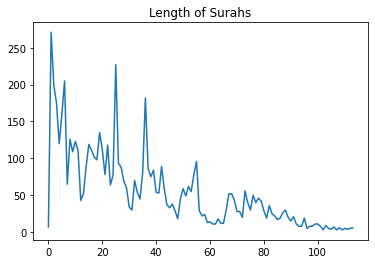

In [12]:
len_of_surahs = []
for i in surah:
    len_of_surahs.append(len(i))

plt.title("Length of Surahs")
plt.plot(len_of_surahs)

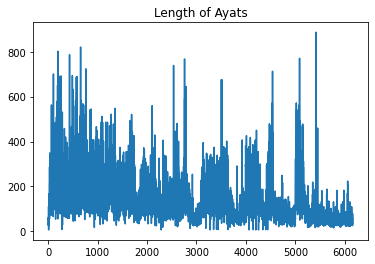

In [13]:
len_of_ayats = []
for i in surah:
    for j in i:
        len_of_ayats.append(len(j))
    
plt.title("Length of Ayats")
plt.plot(len_of_ayats)

# NLP

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(quran)

In [16]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [17]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
        
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [18]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

clean_data = ' '.join(lemmatized_word)
len(clean_data)

451716

In [19]:
df_clean = pd.DataFrame([clean_data])
df_clean.columns = ['script']
df_clean.index = ['quran']
df_clean

,script
quran,name allah gracious merciful praise allah cher...


In [20]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df_clean.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [21]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df_clean.index
data_vect_feat

,aaron,abandon,abandoned,abase,abated,abatement,abhor,abide,abides,abiding,...,young,youth,youthful,zaid,zakariya,zaqqum,zeal,zihar,zodiacal,zone
quran,24,3,3,1,1,2,1,21,1,2,...,9,8,1,1,8,3,2,3,2,2


In [22]:
data = data_vect_feat.transpose()
data.shape

(5211, 1)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sn

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

In [102]:
top_dict['quran'][:10]

[('allah', 2760),
 ('ye', 1942),
 ('lord', 917),
 ('say', 779),
 ('thou', 753),
 ('said', 705),
 ('shall', 615),
 ('thee', 591),
 ('day', 543),
 ('people', 516)]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk


word_count_dict = dict(top_dict['quran'])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=1000,
                          width=1000,height=1000,
                         ).generate(" ".join(popular_words))
plt.imshow(wordcloud, interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 1000 words from Quran",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('topmost.png')

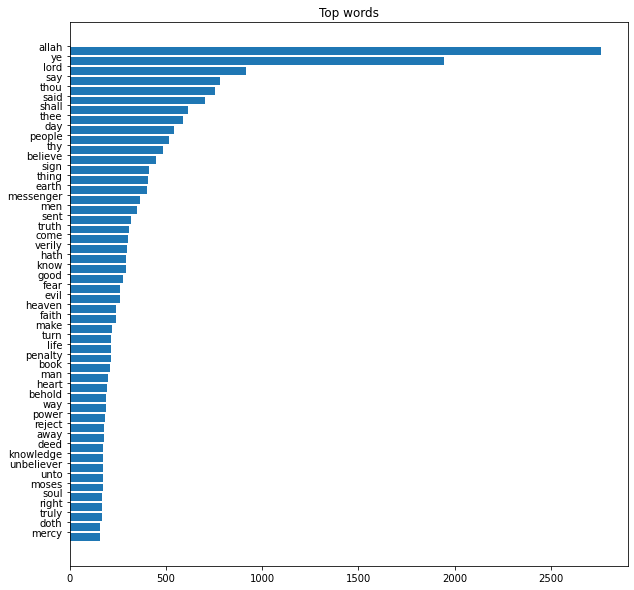

In [112]:
word_count_dict = dict(top_dict['quran'][:50])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.figure(figsize=(10,10))
plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
plt.title("Top words")
plt.show()

# Sentiment Analysis

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Islam is the best religion!")

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}

In [28]:
sia.polarity_scores(quran)

{'neg': 0.105, 'neu': 0.765, 'pos': 0.13, 'compound': 1.0}

In [29]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    print(s_num, sia.polarity_scores(s))
    s_num+=1

1 {'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.9673}
2 {'neg': 0.111, 'neu': 0.765, 'pos': 0.124, 'compound': 0.9993}
3 {'neg': 0.119, 'neu': 0.733, 'pos': 0.148, 'compound': 0.9998}
4 {'neg': 0.121, 'neu': 0.731, 'pos': 0.148, 'compound': 0.9997}
5 {'neg': 0.12, 'neu': 0.768, 'pos': 0.113, 'compound': -0.996}
6 {'neg': 0.105, 'neu': 0.794, 'pos': 0.101, 'compound': -0.993}
7 {'neg': 0.122, 'neu': 0.776, 'pos': 0.102, 'compound': -0.9996}
8 {'neg': 0.11, 'neu': 0.769, 'pos': 0.121, 'compound': 0.8246}
9 {'neg': 0.131, 'neu': 0.74, 'pos': 0.129, 'compound': -0.9389}
10 {'neg': 0.092, 'neu': 0.796, 'pos': 0.112, 'compound': 0.9971}
11 {'neg': 0.102, 'neu': 0.757, 'pos': 0.141, 'compound': 0.9995}
12 {'neg': 0.079, 'neu': 0.805, 'pos': 0.116, 'compound': 0.9994}
13 {'neg': 0.082, 'neu': 0.799, 'pos': 0.119, 'compound': 0.9968}
14 {'neg': 0.105, 'neu': 0.77, 'pos': 0.125, 'compound': 0.9914}
15 {'neg': 0.089, 'neu': 0.8, 'pos': 0.111, 'compound': 0.9835}
16 {'neg': 0.102, 'neu': 

In [30]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [31]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.08534967255499142, subjectivity=0.5377807004615831)

## TEXT SUMMARY

### Summary of Quran

In [32]:
import heapq

In [33]:
def summarise(text):
    sentence_list = nltk.sent_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    word_frequencies = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

    sentence_scores = {}
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

In [34]:
summarise(quran)

'O ye who believe! Behold! He said: "O my people! He said: "O my Lord! He said: "Yea (and more)- for ye shall in that case be (raised to posts) nearest (to my person)." After them succeeded an (evil) generation: They inherited the Book but they chose (for themselves) the vanities of this world saying (for excuse): "(Everything) will be forgiven us." (Iblis) said: "O my Lord!'

### Summary of Surahs

In [35]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    summary = summarise(s)
    if len(summary) < 5:
        print("SURAH NUMBER:",s_num, "SURAH:", s)
    else:
        print("SURAH NUMBER:",s_num, "SUMMARY:", summary)
    print()
    s_num+=1

SURAH NUMBER: 1 SUMMARY: Show us the straight way
The way of those on whom Thou hast bestowed Thy Grace those whose (portion) is not wrath and who go not astray. Praise be to Allah the Cherisher and Sustainer of the worlds;
Most Gracious Most Merciful;
Master of the Day of Judgment. Thee do we worship and Thine aid we seek. In the name of Allah Most Gracious Most Merciful.

SURAH NUMBER: 2 SUMMARY: his Lord said to him: "Bow (thy will to Me):" He said: "I bow (my will) to the Lord and Cherisher of the Universe." The Jews say: "The Christians have naught (to stand) upon; and the Christians say: "The Jews have naught (To stand) upon." O ye who believe! They said: "We shall worship Thy god and the god of thy fathers of Abraham IsmaÂ´il and Isaac- the one (True) Allah: To Him we bow (in Islam)." There came to you Moses with clear (Signs); yet ye worshipped the calf (Even) after that and ye did behave wrongfully. Ramadhan is the (month) in which was sent down the QurÂ´an as a guide to manki

SURAH NUMBER: 12 SUMMARY: The king (of Egypt) said: "I do see (in a vision) seven fat kine whom seven lean ones devour and seven green ears of corn and seven (others) withered. (The king) said (to the ladies): "What was your affair when ye did seek to seduce Joseph from his (true) self?" "Tell us" (they said) "The truth and meaning thereof: for we see thou art one that doth good (to all)." But she in whose house he was sought to seduce him from his (true) self: she fastened the doors and said: "Now come thou (dear one)!" (Joseph) said: "Set me over the store-houses of the land: I will indeed guard them as one that knows (their importance)." They said: "O our father! He (simply) said (to himself): "Ye are the worse situated; and Allah knoweth best the truth of what ye assert!"

SURAH NUMBER: 13 SUMMARY: Mocked were (many) messengers before thee: but I granted respite to the unbelievers and finally I punished them: Then how (terrible) was my requital! If thou dost marvel (at their want o

SURAH NUMBER: 22 SUMMARY: Such (is his state): and whoever holds in honour the symbols of Allah (in the sacrifice of animals) such (honour) should come truly from piety of heart. But I granted respite to the Unbelievers and (only) after that did I punish them: but how (terrible) was my rejection (of them)! Allah will certainly aid those who aid his (cause);- for verily Allah is full of Strength Exalted in Might (able to enforce His Will). (Perhaps) they call on one whose hurt is nearer than his profit: evil indeed is the patron and evil the companion (or help)! To every people did We appoint rites (of sacrifice) that they might celebrate the name of Allah over the sustenance He gave them from animals (fit for food). For they have been guided (in this life) to the purest of speeches; they have been guided to the Path of Him Who is Worthy of (all) Praise. Those who believe (in the QurÂ´an) those who follow the Jewish (scriptures) and the Sabians Christians Magians and Polytheists#NAME?



SURAH NUMBER: 34 SUMMARY: Say: "Verily my Lord doth cast the (mantle of) Truth (over His servants)- He that has full knowledge of (all) that is hidden." They worked for him as he desired (making) arches images basons as large as reservoirs and (cooking) cauldrons fixed (in their places): "Work ye sons of David with thanks! Say: "No reward do I ask of you: it is (all) in your interest: my reward is only due from Allah: And He is witness to all things." The Unbelievers say: "We shall neither believe in this scripture nor in (any) that (came) before it." Say: "Show me those whom ye have joined with Him as partners: by no means (can ye). Say: "Call upon other (gods) whom ye fancy besides Allah: They have no power#NAME?#NAME? Never did We send a warner to a population but the wealthy ones among them said: "We believe not in the (Message) with which ye have been sent."

SURAH NUMBER: 35 SUMMARY: But no change wilt thou find in AllahÂ´s way (of dealing): no turning off wilt thou find in Allah

SURAH NUMBER: 50 SUMMARY: Behold two (guardian angels) appointed to learn (his doings) learn (and noted them) one sitting on the right and one on the left. And there will come forth every soul: with each will be an (angel) to drive and an (angel) to bear witness. That is a (sort of) return far (from our understanding)." And during part of the night (also) celebrate His praises and (so likewise) after the postures of adoration. (It will be said:) "Thou wast heedless of this; now have We removed thy veil and sharp is thy sight this Day!" And the stupor of death will bring Truth (before his eyes): "This was the thing which thou wast trying to escape!" And his Companion will say: "Here is (his Record) ready with me!"

SURAH NUMBER: 51 SUMMARY: (Abraham) said: "And what O ye Messengers is your errand (now)?" And in the Thamud (was another Sign): Behold they were told "Enjoy (your brief day) for a little while!" For the Wrong-doers their portion is like unto the portion of their fellows (of 

SURAH NUMBER: 64 SUMMARY: He knows what is in the heavens and on earth; and He knows what ye conceal and what ye reveal: yea Allah knows well the (secrets) of (all) hearts. No kind of calamity can occur except by the leave of Allah: and if any one believes in Allah (Allah) guides his heart (aright): for Allah knows all things. Say: "Yea By my Lord Ye shall surely be raised up: then shall ye be told (the truth) of all that ye did. So obey Allah and obey His Messenger: but if ye turn back the duty of Our Messenger is but to proclaim (the Message) clearly and openly. But Allah can do without (them): and Allah is free of all needs worthy of all praise. That was because there came to them messengers with Clear Signs but they said: "Shall (mere) human beings direct us?" But if ye forgive and overlook and cover up (their faults) verily Allah is Oft-Forgiving Most Merciful.

SURAH NUMBER: 65 SUMMARY: Through the midst of them (all) descends His Command: that ye may know that Allah has power ov

SURAH NUMBER: 86 SUMMARY: He is created from a drop emitted-
Proceeding from between the backbone and the ribs:
Surely (Allah) is able to bring him back (to life)! The Day that (all) things secret will be tested
(Man) will have no power and no helper. Therefore grant a delay to the Unbelievers: Give respite to them gently (for awhile). As for them they are but plotting a scheme
And I am planning a scheme. Now let man but think from what he is created!

SURAH NUMBER: 87 SUMMARY: And granted guidance;
And Who bringeth out the (green and luscious) pasture
And then doth make it (but) swarthy stubble. And We will make it easy for thee (to follow) the simple (Path). By degrees shall We teach thee to declare (the Message) so thou shalt not forget
Except as Allah wills: For He knoweth what is manifest and what is hidden. Day (behold) ye prefer the life of this world;
But the Hereafter is better and more enduring. Therefore give admonition in case the admonition profits (the hearer). But those 

# Search Engine 

In [51]:
import tensorflow as tf
import tensorflow_hub as hub
from tqdm import tqdm
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel

In [38]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali Zahid Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
df["useful_info"] =df.Translation.replace(to_replace='[!"#$%&\'()*+,/:;<=>?@[\\]^_`{|}~]',value=' ',regex=True) 
#remove punctuation
df.useful_info =df.useful_info.replace(to_replace='-',value=' ',regex=True)
df.useful_info =df.useful_info.replace(to_replace='\s+',value=' ',regex=True)    #remove new line
df.useful_info =df.useful_info.replace(to_replace='  ',value='',regex=True)   #remove double white space  
df.useful_info =df.useful_info.replace(to_replace="'",value='',regex=True)   


df.useful_info = df.useful_info.apply(lambda x:x.strip())  # Ltrim and Rtrim of whitespace

df['useful_info']=[entry.lower() for entry in df['useful_info']] #Lowercase

In [40]:
df["info_tokenize"]= [word_tokenize(entry) for entry in tqdm(df["useful_info"])] 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6162/6162 [00:01<00:00, 5266.70it/s]


In [41]:
def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    clean_k =pd.DataFrame()
    word_Lemmatized = WordNetLemmatizer()
    for index,entry in tqdm(enumerate(data)):
        
        Final_words = []
        for word, tag in pos_tag(entry):
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
        
        clean_k.loc[index,'Keyword_final'] = str(Final_words)
    clean_k=clean_k.replace(to_replace ="'", value = '', regex = True)
    clean_k=clean_k.replace(to_replace =" ", value = '', regex = True)
    clean_k=clean_k.replace(to_replace ="\[", value = '', regex = True)
    clean_k=clean_k.replace(to_replace ='\]', value = '', regex = True)
    return clean_k

In [42]:
df["Keyword_final"] = wordLemmatizer(df['info_tokenize'])
df.head()

6162it [01:07, 91.80it/s] 


,Surah,Ayat,Translation,useful_info,info_tokenize,Keyword_final
0,1,1,In the name of Allah Most Gracious Most Merciful.,in the name of allah most gracious most merciful.,"[in, the, name, of, allah, most, gracious, mos...","name,allah,gracious,merciful"
1,1,2,Praise be to Allah the Cherisher and Sustainer...,praise be to allah the cherisher and sustainer...,"[praise, be, to, allah, the, cherisher, and, s...","praise,allah,cherisher,sustainer,world"
2,1,3,Most Gracious Most Merciful;,most gracious most merciful,"[most, gracious, most, merciful]","gracious,merciful"
3,1,4,Master of the Day of Judgment.,master of the day of judgment.,"[master, of, the, day, of, judgment, .]","master,day,judgment"
4,1,5,Thee do we worship and Thine aid we seek.,thee do we worship and thine aid we seek.,"[thee, do, we, worship, and, thine, aid, we, s...","thee,worship,thine,aid,seek"


In [44]:
#Using Google Universal Sentence Encoder
#USEmodel = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
USEmodel = hub.load("model/")

In [45]:
train = USEmodel(df.Keyword_final)
train_m = tf.train.Checkpoint(v=tf.Variable(train))

train_m.f = tf.function( lambda  x: exported_m.v * x, input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])

model = train_m.v.numpy()

In [46]:
model.shape

(6162, 512)

In [60]:
def SearchDocument(query,size=10):
    q = [query]
    Q_Train = USEmodel(q)
    
    linear_similarities = linear_kernel(Q_Train, model).flatten() 
    
    Top_index_doc = linear_similarities.argsort()[:-(size+1):-1]
    #print(Top_index_doc)
    linear_similarities.sort()
    find = pd.DataFrame()
    for i,index in enumerate(Top_index_doc):
        find.loc[i,'Surah'] = str(df['Surah'][index])
        find.loc[i,'Ayat'] = str(df['Ayat'][index])
        find.loc[i,'Tranlation'] = df['Translation'][index] 
        
    for j,simScore in enumerate(linear_similarities[:-(size+1):-1]):
        find.loc[j,'Score'] = simScore
        
    if size==1:
        print("Query: ",query,".  Surah:", find.loc[0,'Surah'], " Ayat:", find.loc[0,'Ayat'],"\n")
    else:
        return find

In [82]:
SearchDocument("Happiness")

,Surah,Ayat,Tranlation,Score
0,16,52,To Him belongs whatever is in the heavens and ...,0.439656
1,20,67,So Moses conceived in his mind a (sort of) fear.,0.415242
2,55,68,In them will be Fruits and dates and pomegrana...,0.414635
3,3,88,In that will they dwell; nor will their penalt...,0.406788
4,51,48,And We have spread out the (spacious) earth: H...,0.402913
5,12,27,"""But if it be that his shirt is torn from the ...",0.399255
6,6,37,"They say: ""Why is not a sign sent down to him ...",0.392825
7,18,78,"He answered: ""This is the parting between me a...",0.391247
8,14,49,And thou wilt see the sinners that day bound t...,0.385285
9,26,56,"""But we are a multitude amply fore-warned.""",0.384834


In [73]:
SearchDocument("What reward do I get?")

,Surah,Ayat,Tranlation,Score
0,78,32,Gardens enclosed and grapevines;,0.269470
1,3,17,Those who show patience Firmness and self-cont...,0.244484
2,80,22,Then when it is His Will He will raise him up ...,0.243122
3,8,69,But (now) enjoy what ye took in war lawful and...,0.209417
4,27,10,"""Now do thou throw thy rod!"" But when he saw i...",0.190323
5,3,65,Ye People of the Book! Why dispute ye about Ab...,0.187273
6,44,20,"""For me I have sought safety with my Lord and ...",0.186442
7,94,3,The which did gall thy back?-,0.185104
8,44,57,As a Bounty from thy Lord! that will be the su...,0.184960
9,65,4,Such of your women as have passed the age of m...,0.184224


In [71]:
SearchDocument("What is the punishment for sin?")

,Surah,Ayat,Tranlation,Score
0,6,133,Thy Lord is self-sufficient full of Mercy: if ...,0.221592
1,71,15,"""Â´See ye not how Allah has created the seven ...",0.188571
2,6,14,"Say: ""Shall I take for my protector any other ...",0.185818
3,19,35,It is not befitting to (the majesty of) Allah ...,0.175928
4,2,245,Who is he that will loan to Allah a beautiful ...,0.175535
5,73,9,(He is) Lord of the East and the West: there i...,0.174650
6,6,77,When he saw the moon rising in splendour he sa...,0.174209
7,54,24,"For they said: ""What! a man! a Solitary one fr...",0.171353
8,39,10,"Say: ""O ye my servants who believe! Fear your ...",0.167181
9,40,32,"""And O my people! I fear for you a Day when th...",0.162728
